# Introduction

### Domain-specific area

Fake news has existed as a concept before humans began to write things down on paper. One of the earliest recorded examples would be by Octavian, Julio Caesar’s adopted son against Marc Anthony, who was backed by Cleopatra. It was executed via short slogans written on coins, resulting in Anthony being declared as a traitor and subsequently, war was declared on Cleopatra. 

Recently fake news have been on the rise once more, discrediting political opponents to affect social discourse. Fake news can be split into four main types. Firstly, deliberate fake news is the spreading of intentionally fabricated news. This is often done to either generate money through clicks or to cause confusion or discontent. Secondly, news that hold some truth but used in a misleading way to serve an agenda. Thirdly, fake news stories are sometimes published as satire or parody as a form of humour but when shared out of context they have the potential to fool readers. Last but not least, unintentionally fake news where there is no established baseline for truth. This includes conspiracy theories or rumours. 

Of all various types of misinformation available, fake news articles have been increasingly easier to encounter as they are easy to create and they generate a large amount of revenue through clicks and interactions. Fake news can be commonly found in social media sites such as Twitter and Facebook, or even messaging applications like WhatsApp where quality of sources are often not verified. In this modernised world, these sites and applications are very popular and common, allowing fake news to be spread at an extremely high speed. 

Although fake news bring about many problems, they have had a positive influence to a certain extent. Fake news has led to reliable and quality journalism receiving increased interest, helping old media regain its footing in this digitalised world. However, this does not justify and validate the existence of fake news, and one should learn to discriminate between real and fake news.



### Objectives

The objective of this project is to develop a text classifier to carry out fake news detection so we are able to reduce interference as much as possible. We must know that malicious people spreading fake news do not do it solely for political purposes, businesses can be part of their agenda as well where credibility of the businesses can be affected to reduce or increase the number of customers. However, without prior knowledge of the website’s credibility, one would not be able to tell if it can be trusted or not. 

Some solutions currently being implemented include Twitter requiring users to confirm their identity via email or phone number to combat the creation of spam or bot accounts. Facebook is testing out its external fact-checking program to reduce the visibility of inaccurate stories or posts in news feeds. In the UK, The Independent Press Standard Organisation launched the IPSO mark. Publications would sign up with the organisation to use its physical and online versions of the logo to inform readers about their legitimacy. This allows readers to know that the publication they are using follows the standards of the Editor’s Code of Practice.

However, not all news outlets would sign up with the IPSO initiative. When this happens, the only way to verify the news outlet’s credibility would be to fact check every single news article they post. This requires a lot of manpower and is extremely time consuming, and would often result in users returning to other credible sources. The project would like to explore the possibility of using a text classifier to predict the accuracy and credibility of the various news outlets available. With this classifier, I hope that users would be better equipped to analyse and find out if this particular news outlet can be trusted.


### Dataset

I have managed to identify a suitable dataset that could be representative for the domain of fake news for this particular project. This “Fake and real news dataset” can be accessed via the Kaggle official website. Originally found in the Information Security and Object Technology Research Lab of the University of Victoria, this dataset is split into Fake and True csv files. The files’ original source would be Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley,
January/February 2018, and Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127- 138). 

The dataset was collected from real-world sources such as Reuters.com for the real articles, and various unreliable websites flagged by Politifact for the fake articles. The Fake csv file has 23500 entries and the True csv file has 21400 entries. The data set contains the title, text, subject and date of the article. The subject of the articles refer to the category of news they belong to, such as News, Politics, US_News and etc. Even though the datatype of the data is object, the datatype of title, text, and subject can be considered as string and the data type of date, datetime.

### Evaluation

The evaluation metrics that we will apply would be precision, recall, accuracy and f-score. 

Precision is also known as the quality of positive predictions made by a model. It answers the question of what proportion of the positive predictions was actually correct and is defined by dividing the true positives by the sum of true and false positives. Recall, on the other hand is the fraction of positives that have been correctly predicted. It answers the question of what proportion of actual positives was identified correctly and is defined by dividing the true positives by the sum of true positives and false negatives. 

Accuracy, the simplest metric used in this project, would refer to the ratio of number of correct predictions and the total number of predictions. F1 score combines the precision and recall scores of a model using their harmonic mean. Therefore the higher the F1 score would mean the higher the precision and recall scores, resulting in researchers using this to evaluate their models. F1 score is calculated using the below formula.

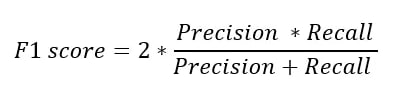

To fully evaluate the effectiveness of a particular model, we have to look at both precision and recall. A perfect machine learning classifier may achieve 100 percent of both precision and recall but in a real-world situation, there is a tug-of-war between precision and recall. A high precision score would usually result in a lower recall and vice versa. However in this project we would aim to have high precision and recall scores, which can be inferred from a high F1 score as a maximised F1 score implies high scores for both precision and recall.

# Implementation

### Importing and exploring data

In [93]:
#basic set up
import os
import numpy as np
import pandas as pd

#various ML toolkits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.utils.extmath import density
from sklearn.pipeline import make_pipeline

#data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix


In [67]:
#importing local csv files
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [68]:
#preview of both datasets
display(fake.head())
display(true.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Both datasets looks very basic at first glance, with four columns. They are the article's title, the article text itself, subject and date of the article. The datasets seem to be very simple so let us take a closer look to see if any cleaning is required.

In [69]:
fake.info()
print('\n')
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


From the above info, we can see that every row of the two datasets are non-null which helps reduce the required data cleaning for this particular dataset. This is due to the fact that data of every single article is required to train the model as long as it is non-null.

In [70]:
display(fake.subject.value_counts())
print('\n')
display(true.subject.value_counts())

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

We can see that the subject column provides slight clarity with regards to differentiating between fake and true news articles. There are no overlapping subjects between the two kinds of articles, although politics in fake news is similar to politicsNews in true news. Thus one can clearly tell fake news based on its subject alone. 

However, we aim to differentiate between the two kinds of articles via their content with our model. Thus this column shall be dropped to facilitate the process. Furthermore, the best way to train the model would be to use a dataset with both fake and true articles in no specific order. 

### Preprocessing

Firstly, we add labels to the dataset so we can identify which articles are fake and real. Next we shall concatenate the two datasets and shuffle the various articles.

In [71]:
fake['label'] = 'fake'
true['label'] = 'true'

In [73]:
#concatenate the two datasets
dataset = pd.concat([fake, true], axis=0)
#shuffles rows in dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.drop('subject', axis=1)

,title,text,date,label
0,WATCH: Ted Cruz Humiliated For Blatantly Lyin...,Ted Cruz just keeps on embarrassing himself.Du...,"March 11, 2016",fake
1,"Erdogan, Putin say U.S. decision on Jerusalem ...",ANKARA (Reuters) - Turkish President Tayyip Er...,"December 7, 2017",true
2,Russian lawmakers vote to bar entry to reporte...,MOSCOW (Reuters) - The State Duma lower house ...,"December 6, 2017",true
3,DARPA Spending $62 Million to Create Military ...,21st Century Wire says Science fiction is now ...,"March 9, 2016",fake
4,WATCH THIS: DID GOOGLE MANIPULATE Search For H...,While researching for a wrap-up on the June 7 ...,"Jun 10, 2016",fake
...,...,...,...,...
44893,News Legend Dan Rather Just RAZED Trump’s Hat...,Trump s first immigration speech following his...,"September 1, 2016",fake
44894,Blackstone's Schwarzman sees historic regulato...,(Reuters) - Blackstone Group LP (BX.N) Chairma...,"December 6, 2016",true
44895,CLASSLESS REP WILSON: Trump Will Claim “Somebo...,Rep. Frederica Wilson spoke on Thursday at the...,"Nov 4, 2017",fake
44896,"Trump’s Deplorables Freak Out, Demand We Repe...",Women now have even more of a reason to vote o...,"October 12, 2016",fake


### Splitting dataset

Now we split the dataset into training and test dataset 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['label'], test_size=0.25)

#preview of X_train
display(X_train.head())

print('\n')
#preview of y_train
display(y_train.head())


2044     After allegedly registering 10,000 Muslims to ...
36711    Pregnant women throughout the America s are th...
38178    ISTANBUL (Reuters) - Dozens of people were sto...
24903    Don t mess with Texas A Texas pig farmer found...
35937    WASHINGTON (Reuters) - U.S. Vice President Mik...
Name: text, dtype: object

2044     fake
36711    fake
38178    true
24903    fake
35937    true
Name: label, dtype: object

### Data representation


In [76]:
#initialise TfidfVectorizer object and remove stop words
main_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

#fit vectorizer and transform X_train into tf-idf matrix
tfidf_train = main_tfidf.fit_transform(X_train)

#use fitted vectorizer to transform X_test
tfidf_test = main_tfidf.transform(X_test)

tfidf_train

<33673x108161 sparse matrix of type '<class 'numpy.float64'>'
	with 5135691 stored elements in Compressed Sparse Row format>

The text representation I have chosen term frequency-inverse document frequency, tf-idf for short. It is an algorithm that utilises the frequency of words to determine how relevant or important they are to a specific document. TF refers to term frequency, which refers to the frequency of a particular term in the document. There are multiple ways to define frequency, but the most common way is the number of times the word appears in a document. 

IDF refers to inverse document frequency, which looks at how common or uncommon a word is in the corpus. IDF is calculated as follows, where t is the particular term and N is the number of documents (d) in the corpus (D). The denominator is the number of documents which t appears in.

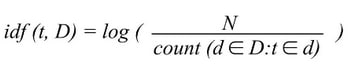

The term with the highest score is the most relevant to that document. If a term appears very commonly across different documents it will be penalised with a small idf. However, an uncommon word with a smaller value of idf may have a bigger idf value for not appearing often in different documents.

### Classification approach

The model that I have chosen is the Passive-Aggressive Classifier. It is an online algorithm where input datacomes in sequential order and the model is updated step-by-step. Compared to batch learning where entire training datasets are used at once, an online algorithm is especially useful where there is a huge amount of data and it is computationally impractical due to the size of the data. This is very useful when dealing with datasets containing increasing number of examples like news articles or tweets. Although currently we are using a static database in this project, this approach will be extremely useful and advantageous when used in a real-life scenario where the dataset involved contains an increasing number of articles or tweets.

The classifier is named that way because it is passive when the prediction is correct, the model is kept and no changes are made. However, when the prediction is incorrect, it becomes aggressive and some changes are made to the model to correct it.

In [77]:
#import passiveaggressiveclassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [103]:
#initiate PassiveAggressiveClassifier and train it with features from dataset
pa_clsf = PassiveAggressiveClassifier(max_iter=100)
pa_clsf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=100)

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

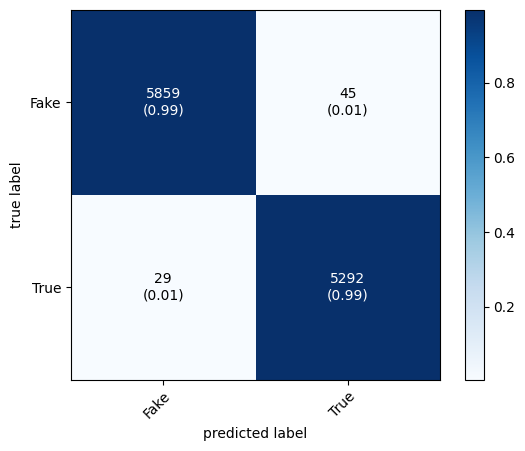

In [109]:
#implementing passiveaggressive algo to test dataset
y_pred = pa_clsf.predict(tfidf_test)

#initialising and plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, show_normed=True, colorbar=True, class_names=['Fake', 'True'])

In [112]:
#classification report of precision, recall and f1score
print(classification_report(y_test, y_pred))

#initializing all scores and printing them
acc_score = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, pos_label='true')
prec_score = precision_score(y_test, y_pred, pos_label='true')
rec_score = recall_score(y_test, y_pred, pos_label='true')

print('The accuracy of prediction is {:.2f}%.\n'.format(acc_score*100))
print('The precision of prediction is {:.4f}.\n'.format(prec_score))
print('The recall of prediction is {:.4f}.\n'.format(rec_score))
print('The f1 score is {:.4f}.\n'.format(f1score))


              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      5904
        true       0.99      0.99      0.99      5321

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

The accuracy of prediction is 99.34%.

The precision of prediction is 0.9916.

The recall of prediction is 0.9945.

The f1 score is 0.9931.



# Conclusions

### Evaluation

We can see that this model has impressive performance when it comes to predicting if news are real or fake. With an accuracy of 99.34% the model is almost always correct with its prediction. Its precision score is at 0.9916 which means when it predicts that a particular piece of news is true, it is correct 99.16% of the time.

The recall score of the model is 0.9945 which means for all the true news there are in the dataset, the model has correctly predicted 99.45% of them. A good F1 score would indicate good precision and recall values and we have achieved that here with a score of 0.9931. Overall this model can be considered a huge success.

However, in real-world scenarios it may not be possible to consistently achieve a high F1 score. In that case, we should aim to prioritise a high recall score. It is more acceptable to classify a news article that is true as fake news because we can rectify these mistakes by running manual quality checks. However it would not be acceptable to classify fake news as real news as this may damage the reputation of the media outlet’s credibility. 

### Summary and conclusions

Overall the project can be considered a success due to its quantitative results of high scores in all the specified evaluation metrics. With the success of this particular model, we can now predict if news articles are fake or true. This allows accurate analysis of media outlets’ news articles to be done, which results in the possibility of publishing a list of credible media outlets for the public. With this list, users can perhaps utilise it to differentiate between proper news outlets and gossip news outlet. They can then decide which particular sites to visit based on their mood and preference.

This solution is transferable to a variety of different domain-specific areas. Firstly, the passive aggressive classifier can be used in spam filtering, specifically in the domain of emails. The algorithm can be trained on a dataset of known spam emails, allowing them to be detected and filtered to remove them from the inbox. The classifier can be trained on a fraud cases dataset which can be used to then detect fraudulent transactions. This can greatly assist consumers by identifying fraudulent transactions which would then prevent scams from happening.

This particular approach may not be replicated by using a different programming language as I have been unable to find an alternative to the passive aggressive classifier in other programming languages. A different development environment will be able to take this approach as long as python can be run and the specific libraries can be imported in the particular environment. There are a couple of alternative algorithms we can use in this project. We can use the logistic regression or Naive Bayes model to implement a simple classification algorithm. The potential benefits of these two models would be others would be able to run this on other programming languages such as Ruby. Users will be able to use different libraries in python such as StatsModels to run logistic regression. The potential drawbacks would be the other algorithms may not be as accurate as the PassiveAggressiveClassifier in a real-world scenario considering it is best used when dealing with a particularly large dataset like news articles or tweets.